# Predict the Cost of Homes in California Using Numpy + Pandas in Jupyter
This notebook trains a machine learning model that predicts home costs in California.

The overall objective is to predict the value of home prices using 9 feature variables and 1 target variable:

## Feature Variables
1. longitude: A measure of how far west a house is (a higher value is farther west)
2. latitude: A measure of how far north a house is (a higher value is farther north)
3. housingMedianAge: Median age of a house within a block (a lower number is a newer building)
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. oceanProximity: Location of the house in proximity to the ocean
## Target Variable
medianHouseValue: Median house value for households within a block (measured in US Dollars)
Background
Scikit-learn
Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering learning algorithms.

# Obtain & Load Data

In [1]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Read in Data into Pandas dataframe
housing_df = pd.read_csv('/Users/varadtawde/Downloads/ML Project/housing.csv')

# Use .info() to show the features (i.e. columns) in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [3]:
# Using .shape to understand how many observations (ie rows/records) of the dataset
housing_df.shape

(15210, 10)

In [4]:
# Using .head() function to view the first few observations (i.e. rows/records) of the dataset 
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Using .tail() function to view the last few observations (i.e. records) of the dataset 
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15205,-117.07,33.01,5.0,5870.0,977.0,1917.0,842.0,5.1998,294100.0,<1H OCEAN
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,209200.0,<1H OCEAN
15207,-117.07,33.00,4.0,6242.0,1258.0,2211.0,1116.0,4.2500,281600.0,<1H OCEAN
15208,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN
15209,-117.08,33.01,5.0,5659.0,931.0,2565.0,902.0,6.1949,23.0,NaN


In [6]:
#Using .describe() to see metrics about the dataset (count, mean, std, min, 25%, 50%, 75%, max)
# Count is the count of non-null observations (i.e. rows)
# Mean is the average of values for the given column
# Std is standard deviation - how far off from the mean the values are
# Min is the minimum amount of the value

housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15210.000000,15210.000000,15210.000000,15210.000000,15062.000000,15210.000000,15210.000000,15210.000000,15210.000000
mean,-119.013605,35.157512,28.958909,2639.069954,543.708405,1443.109467,502.916568,3.803106,198435.696187
std,1.840608,2.049149,12.366761,2266.803851,437.779990,1142.507915,394.184695,1.888558,111404.650522
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,23.000000
25%,-120.380000,33.870000,19.000000,1430.000000,295.000000,791.000000,278.000000,2.510175,116700.000000
50%,-118.280000,34.080000,30.000000,2092.000000,433.000000,1167.000000,407.000000,3.454250,170700.000000
75%,-117.900000,36.950000,37.000000,3107.000000,648.000000,1742.000000,602.000000,4.660575,245775.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500001.000000


# Prepare & Preprocess Data


## Understanding missing data that could skew the model

In [7]:
# Verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        148
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         1
dtype: int64

In [8]:
# Calculate the % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0] * 100

np.float64(0.9730440499671269)

## Using Imputation to handle missing data

In [9]:
from sklearn.impute import KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [10]:
# Handle numeric columns
housing_df_temp_numeric = housing_df_temp.select_dtypes(include=['number'])

# Initialize and apply KNNImputer
knn = KNNImputer(n_neighbors=3)
array_values = knn.fit_transform(housing_df_temp_numeric)
housing_df_temp_numeric = pd.DataFrame(array_values, columns=housing_df_temp_numeric.columns)

# Handle categorical columns separately (e.g., ocean_proximity)
housing_df_temp['ocean_proximity'].fillna(housing_df_temp['ocean_proximity'].mode()[0], inplace=True)

# Combine numeric and categorical columns back together
housing_df_temp.update(housing_df_temp_numeric)

# Verify no missing values remain
print(housing_df_temp.isnull().sum())



total_bedrooms     0
ocean_proximity    0
dtype: int64


/var/folders/vd/rbgclqvd1_z7rhs3rv_jn7fw0000gn/T/ipykernel_27442/3975633187.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df_temp['ocean_proximity'].fillna(housing_df_temp['ocean_proximity'].mode()[0], inplace=True)


In [11]:
housing_df_temp.isnull().sum()

total_bedrooms     0
ocean_proximity    0
dtype: int64

In [12]:
for column_name in new_column_list:
    # Update the column in housing_df with the corresponding column from housing_df_temp
    housing_df[column_name] = housing_df_temp[column_name]

# Confirm all missing values are filled
print(housing_df.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Use visualizations to understand the relationship of the target variable with other features

### Histograms

Text(0.5, 0, 'House values')

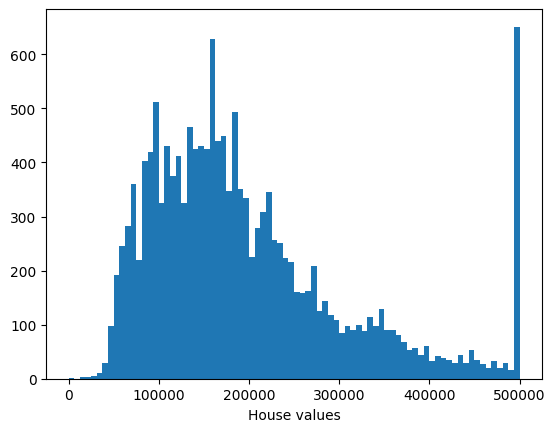

In [13]:
# Plot the distribution of the target variable (median_house_value) using a histogram
# We can see from the plot that the values of Median House Value are distributed normally with few outliers. 
# Most of the house are around 100,000-200,000 range

plt.hist(housing_df['median_house_value'], bins =80)
plt.xlabel("House values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

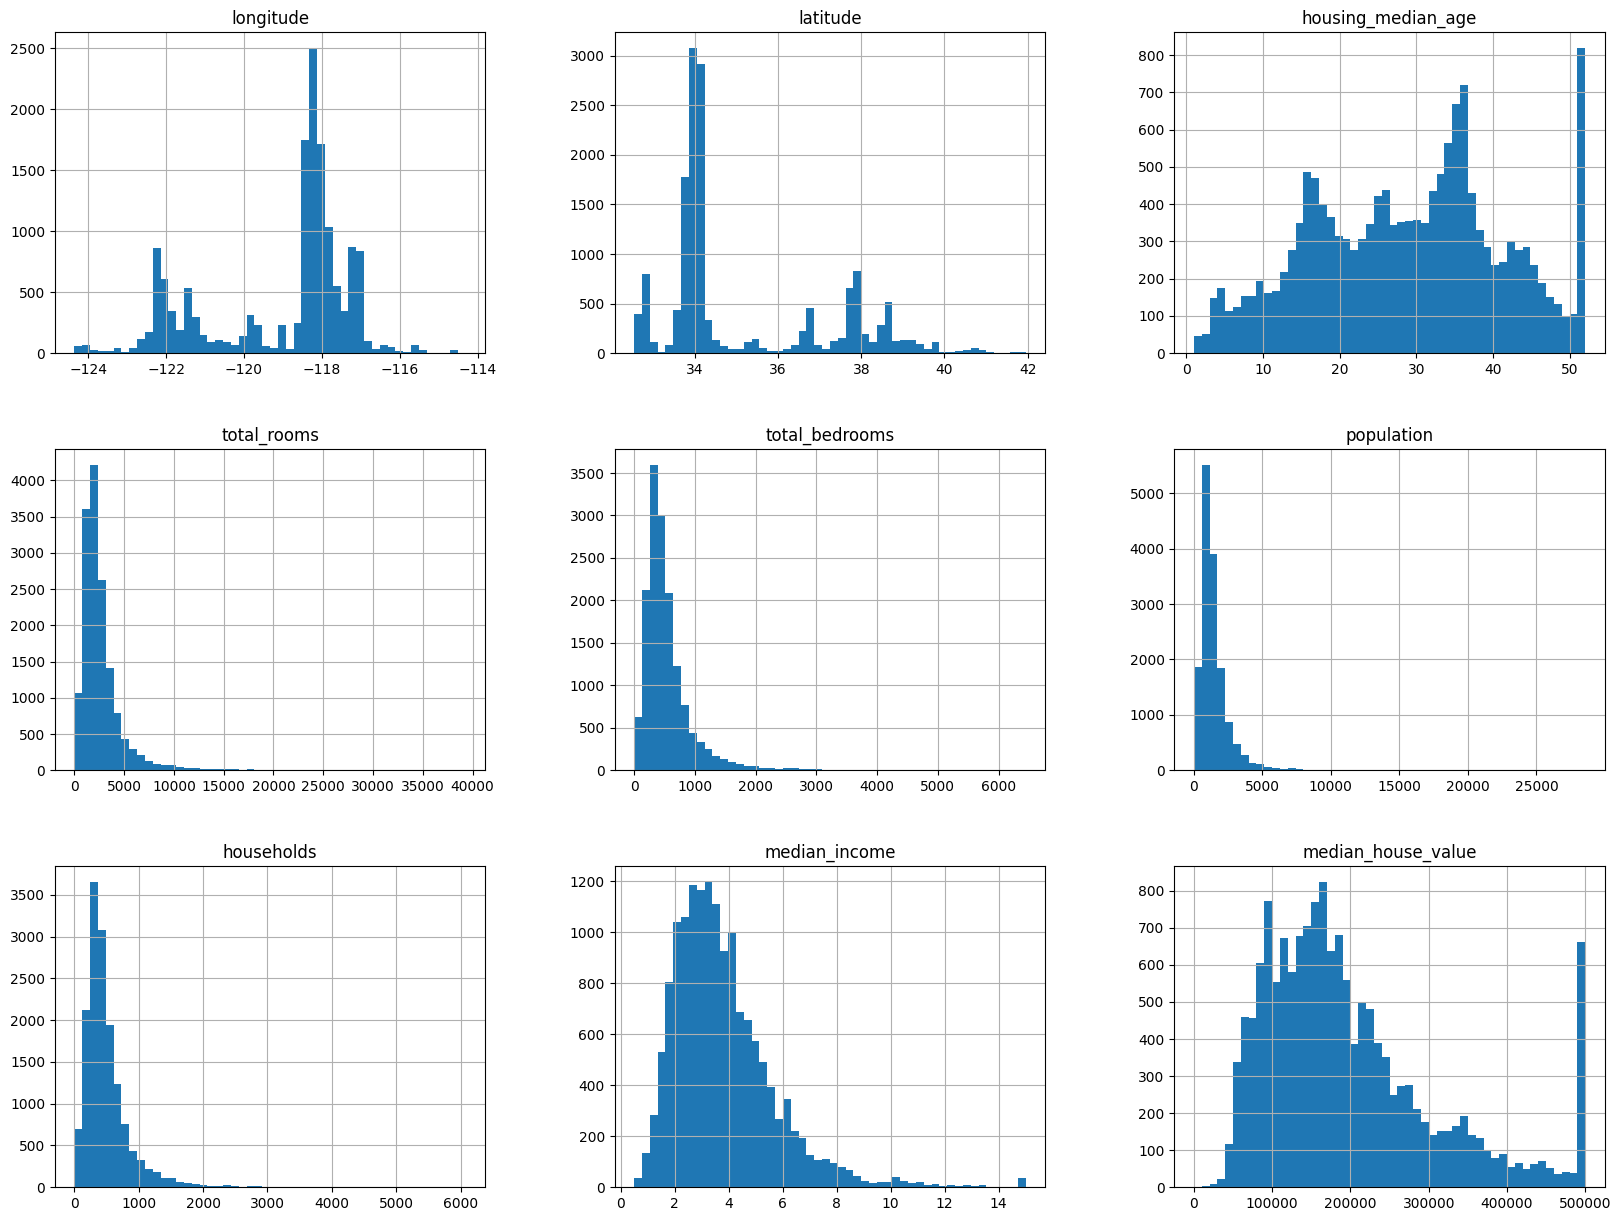

In [14]:
#using housing_df as to not plot the encoded values for OCEAN_PROXIMITY 
housing_df.hist(bins = 50, figsize=(20,15))

#### Using a heatmap to show correlation

In [15]:
# Plot a graphical correlation matrix for each pair of columns in the dataframe
corr = housing_df.corr(numeric_only = True)
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.930435           -0.081186     0.035471   
latitude            -0.930435  1.000000           -0.031497    -0.013397   
housing_median_age  -0.081186 -0.031497            1.000000    -0.380050   
total_rooms          0.035471 -0.013397           -0.380050     1.000000   
total_bedrooms       0.065267 -0.051922           -0.345362     0.926933   
population           0.099139 -0.101685           -0.312717     0.859815   
households           0.054572 -0.062405           -0.326337     0.915375   
median_income        0.037959 -0.105180           -0.132122     0.212847   
median_house_value   0.078021 -0.226672            0.067785     0.140808   

                    total_bedrooms  population  households  median_income  \
longitude                 0.065267    0.099139    0.054572       0.037959   
latitude                 -0.051922   -0.101685   -0.062405      -0.105180   
housing_

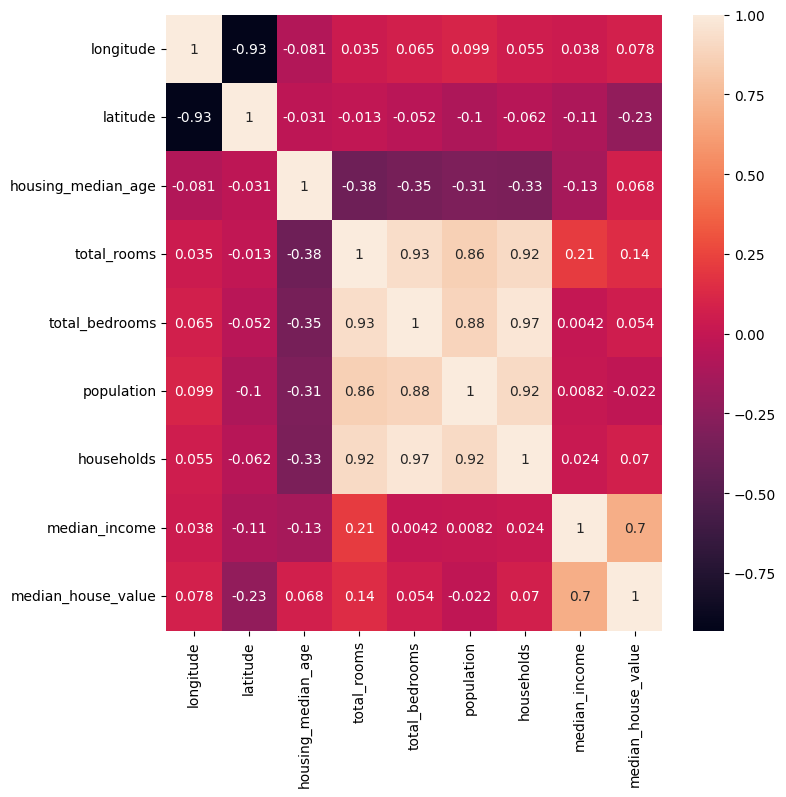

In [16]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)
plt.show()

#### Feature engineering

In [17]:
#new feature adding that is ratio of the total rooms to households
housing_df['rooms_per_household']= housing_df['total_rooms'] / housing_df ['households']

#new feature adding that is ratio of the total bedrooms to the total rooms
housing_df['bedrooms_per_room']= housing_df['total_bedrooms'] / housing_df ['total_rooms']

#new feature adding that is ratio of the population to the households
housing_df['population_per_household'] = housing_df['population'] / housing_df ['households']

housing_df['coords'] = housing_df['longitude'] / housing_df ['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 15210 non-null  float64
 1   latitude                  15210 non-null  float64
 2   housing_median_age        15210 non-null  float64
 3   total_rooms               15210 non-null  float64
 4   total_bedrooms            15210 non-null  float64
 5   population                15210 non-null  float64
 6   households                15210 non-null  float64
 7   median_income             15210 non-null  float64
 8   median_house_value        15210 non-null  float64
 9   ocean_proximity           15210 non-null  object 
 10  rooms_per_household       15210 non-null  float64
 11  bedrooms_per_room         15210 non-null  float64
 12  population_per_household  15210 non-null  float64
 13  coords                    15210 non-null  float64
dtypes: flo

In [18]:
# remove total_rooms, households, total bedrooms, popluation, longitude, latitude
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        15210 non-null  float64
 1   median_income             15210 non-null  float64
 2   median_house_value        15210 non-null  float64
 3   ocean_proximity           15210 non-null  object 
 4   rooms_per_household       15210 non-null  float64
 5   bedrooms_per_room         15210 non-null  float64
 6   population_per_household  15210 non-null  float64
 7   coords                    15210 non-null  float64
dtypes: float64(7), object(1)
memory usage: 950.8+ KB


#### Heatmap after removing correlation

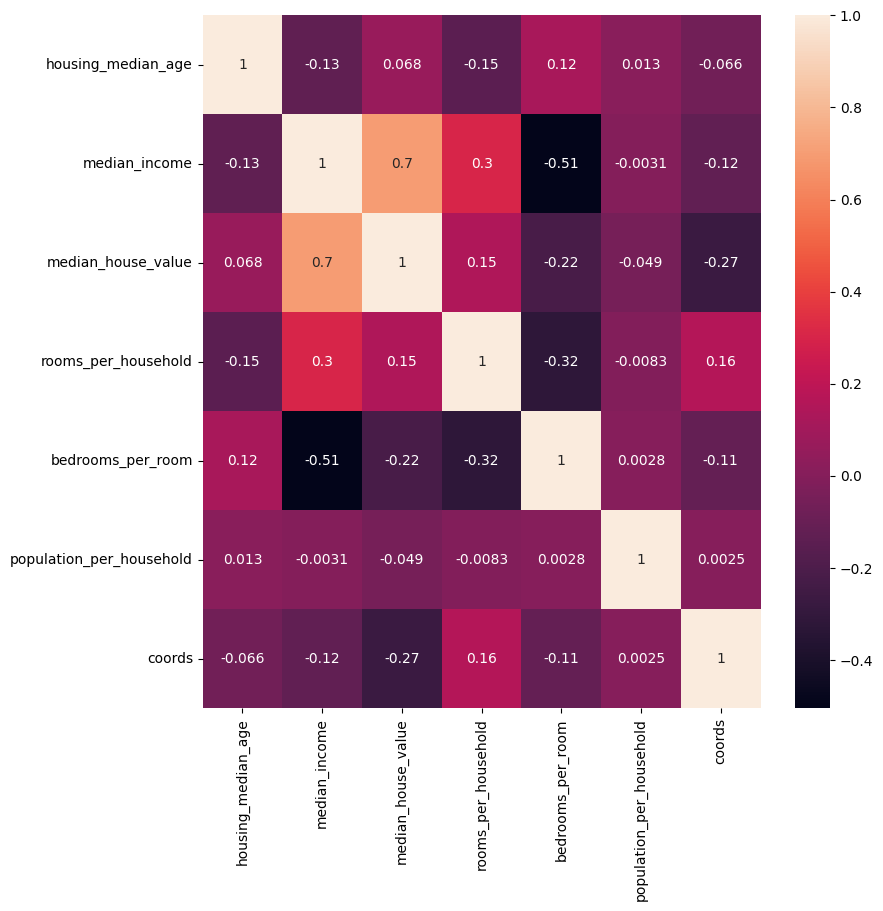

In [19]:
corr = housing_df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (9,9))

sns.heatmap(corr, annot=True)
plt.show()

### Encode Categorical Data

In [20]:
# Let's review our data types again; showing that ocean_proximity is the only categorical data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        15210 non-null  float64
 1   median_income             15210 non-null  float64
 2   median_house_value        15210 non-null  float64
 3   ocean_proximity           15210 non-null  object 
 4   rooms_per_household       15210 non-null  float64
 5   bedrooms_per_room         15210 non-null  float64
 6   population_per_household  15210 non-null  float64
 7   coords                    15210 non-null  float64
dtypes: float64(7), object(1)
memory usage: 950.8+ KB


In [21]:
#Unique categories for ocean_proximity
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
# let's count
housing_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7300
INLAND        4929
NEAR OCEAN    1489
NEAR BAY      1487
ISLAND           5
Name: count, dtype: int64

### One Hot Encoding

In [23]:
#One-hot encoding

print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
15205       True   False   False     False       False
15206       True   False   False     False       False
15207       True   False   False     False       False
15208       True   False   False     False       False
15209       True   False   False     False       False

[15210 rows x 5 columns]


In [24]:
#Replacing the ocean_proximity collumn values using get_dummies function

housing_df_encoded = pd.get_dummies(data = housing_df, columns = ['ocean_proximity'])
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


In [25]:
print(housing_df_encoded.columns)

Index(['housing_median_age', 'median_income', 'median_house_value',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'coords', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [26]:
print(housing_df_encoded.columns.tolist())


['housing_median_age', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'coords', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


### Train the Model

In [27]:
import sklearn
from sklearn.model_selection import train_test_split

# First, let's see what the column names look like after transformation
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Let's store the feature columns in a list to make it more readable
feature_columns = [
    'housing_median_age',
    'median_income',
    'bedrooms_per_room',
    'population_per_household',
    'coords',
    'ocean_proximity__1h_ocean',  # Fixed name
    'ocean_proximity_inland',
    'ocean_proximity_island',
    'ocean_proximity_near_bay',
    'ocean_proximity_near_ocean'
]

# Now select the features
X = housing_df_encoded[feature_columns]
y = housing_df_encoded['median_house_value']

print("\nFeature DataFrame head:")
print(X.head())



Feature DataFrame head:
   housing_median_age  median_income  bedrooms_per_room  \
0                41.0         8.3252           0.146591   
1                21.0         8.3014           0.155797   
2                52.0         7.2574           0.129516   
3                52.0         5.6431           0.184458   
4                52.0         3.8462           0.172096   

   population_per_household    coords  ocean_proximity__1h_ocean  \
0                  2.555556 -3.226769                      False   
1                  2.109842 -3.228209                      False   
2                  2.802260 -3.229590                      False   
3                  2.547945 -3.229855                      False   
4                  2.181467 -3.229855                      False   

   ocean_proximity_inland  ocean_proximity_island  ocean_proximity_near_bay  \
0                   False                   False                      True   
1                   False                   False    

In [28]:
print(housing_df_encoded.columns)


Index(['housing_median_age', 'median_income', 'median_house_value',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'coords', 'ocean_proximity__1h_ocean', 'ocean_proximity_inland',
       'ocean_proximity_island', 'ocean_proximity_near_bay',
       'ocean_proximity_near_ocean'],
      dtype='object')


### Split Training & Test Data

In [29]:
# Splitting the data into training and testing sets in numpy arrays
# We train the model with 70% of the samples and test with the remaining 30%
# X -> array with the inputs; y -> array of the outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10647, 10)
(4563, 10)
(10647,)
(4563,)


### Linear Regression - Model Training

In [30]:
# Use scikit-learn’s LinearRegression to train the model on both the training and evaluate it on the test sets
from sklearn.linear_model import LinearRegression
# Create a Linear regressor using all the feature variables
reg_model = LinearRegression()
#Train the model by using training sets
reg_model.fit(X_train, y_train)

LinearRegression()

### Run the Predictions

In [31]:
y_pred_test = reg_model.predict(X_test)

### Evaluate the Model

In [32]:
#Evaluating the model 
#Compare the actual values (ie target) with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted' :y_pred_test})
pred_test_df

,Actual,Predicted
1087,78700.0,78202.285611
10052,144300.0,128506.738524
8722,343000.0,300762.813631
8747,328900.0,233505.952108
13614,72100.0,93459.537333
...,...,...
1194,86300.0,68729.004576
12899,161700.0,142074.056738
51,93800.0,123987.508179
4743,202100.0,223475.592089


### Evaluate the model using the 𝑅^2 metric

In [33]:
#Evaluate model using R^2
#R^2 is another way to evaluate the performance of the regression model
# 1 means the model is perfect and 0 means the model will perform poorly

r2_reg_model_test = round(reg_model.score(X_test, y_test), 2)
print ("R^2 Test : {}".format(r2_reg_model_test))

R^2 Test : 0.61


### RandomForestRegressor - Model Training

In [34]:
# Trying another machine learning model - Random Forest 
# Use scikit-learn’s Randorm Forest to train the model on both the training and evaluate it on the test sets

from sklearn.ensemble import RandomForestRegressor
#Creating a regressor using all the feature variable

rf_model = RandomForestRegressor(n_estimators = 10, random_state = 10)
#Training the model

rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Run the Predictions

In [35]:
#Running the predictions
y_rf_pred_test = rf_model.predict(X_test)

### Evaluate the Model

In [36]:
#Evaluate the Random Forest model
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted':y_rf_pred_test})
rf_pred_test_df

,Actual,Predicted
1087,78700.0,96450.0
10052,144300.0,114810.0
8722,343000.0,336260.0
8747,328900.0,340800.1
13614,72100.0,80540.0
...,...,...
1194,86300.0,81400.0
12899,161700.0,143040.0
51,93800.0,111900.0
4743,202100.0,227020.0


In [37]:
#Determine accuracy using R^2
from sklearn.metrics import r2_score, mean_squared_error
score = r2_score(y_test, y_rf_pred_test)
print("R^2 : {}%".format(round(score, 2)*100))

R^2 : 78.0%


In [38]:
# Determine RMSE - Root Mean Squared Error on the test data
print('RMSE on test data: ', mean_squared_error(y_test, y_rf_pred_test)**(0.5))

RMSE on test data:  52640.2508129292


## Feature Importance

<Axes: >

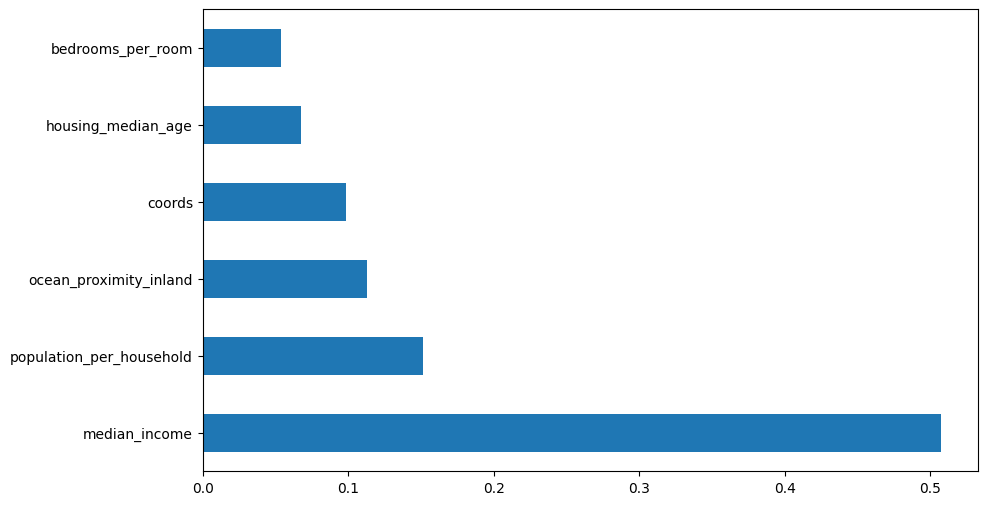

In [39]:
#Determine Feature Importance
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [40]:
#Training data with 5 most imprtant features
train_x_if = X_train[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland', 'population_per_household', 'median_income']]
test_x_if = X_test[['bedrooms_per_room', 'housing_median_age', 'coords', 'ocean_proximity_inland', 'population_per_household', 'median_income']]

#Create an object of the RandomForestRegressor Model
rm_model_if = RandomForestRegressor(n_estimators = 10, random_state = 10)

#fit the model with training data
rm_model_if.fit(train_x_if, y_train)

#predict the target on the test data
predict_test_with_if = rm_model_if.predict(test_x_if)

In [41]:
# Root Mean Squared Error on the train and test data
print('RMSE on test data: ', mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  52482.083106111975


## XGBoost - Model Training

In [42]:
pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
# Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.
# Use the scikit-learn wrapper classes: XGBRegressor and XGBClassifier. 

# try another machine learning algorithm : XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [44]:
# Train the model using the training sets
xgb_model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Run the predictions

In [45]:
#Run the predictions on the training and testing data
y_xgb_pred_test = xgb_model.predict(X_test)

### Evaluate the model

In [46]:
#Evaluating the model
#Comparing the actual values (target) with the predicted values by model

xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df

,Actual,Predicted
1087,78700.0,93893.054688
10052,144300.0,137811.875000
8722,343000.0,315384.718750
8747,328900.0,336598.281250
13614,72100.0,74760.921875
...,...,...
1194,86300.0,83201.257812
12899,161700.0,153218.937500
51,93800.0,104997.578125
4743,202100.0,200273.578125


In [47]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np  # Make sure numpy is imported

# For XGBoost predictions
score = r2_score(y_test, y_xgb_pred_test)
print("R^2 : {}%".format(round(score, 2)*100))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_xgb_pred_test)))

R^2 : 79.0%
Root Mean Square Error: 51555.19388724088


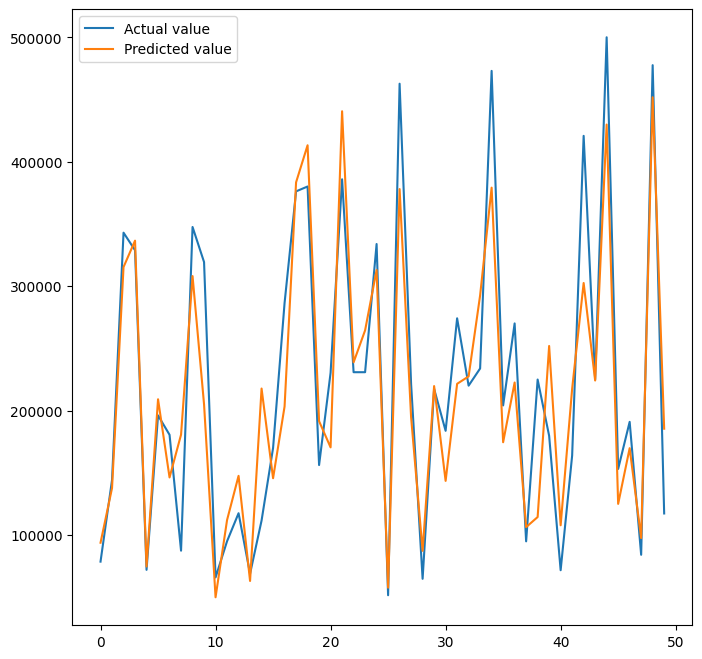

In [48]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'], axis = 1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value', 'Predicted value'])

In [49]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
import math
rmse = math.sqrt(mean_squared_error(y_test, y_xgb_pred_test))
print(rmse)

51555.19388724088


In [50]:
#Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_xgb_pred_test))

34345.47448738494


### Cross Validation score

In [51]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Define the K-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store scores
scores = []

# Perform k-fold cross validation
for train_index, test_index in kf.split(X):
    # Split data
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Train model
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions
    y_pred = xgb_model.predict(X_test_fold)
    
    # Calculate R² score
    score = r2_score(y_test_fold, y_pred)
    scores.append(score)

# Print results
print("Cross-validation scores:", scores)
print("Mean R² score:", np.mean(scores))
print("Standard deviation of R² scores:", np.std(scores))

Cross-validation scores: [0.7931932994802005, 0.7760799267367855, 0.7735416365759018, 0.7796681814072921, 0.7702269054737418]
Mean R² score: 0.7785419899347843
Standard deviation of R² scores: 0.00795154195269382


### Hyperparameter Tuning

In [52]:
# Hyperparameter tuning
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [53]:
xgb_model_2 = XGBRegressor(
    gamma = 0.05,
    learning_rate = 0.01,
    max_depth = 6,
    n_estimators = 1000,
    n_jobs = 16,
    objective = 'reg:squarederror',
    subsample=0.8,
    scale_pos_weight = 0,
    reg_alpha = 0,
    reg_lambda = 1,
    verbosity = 1)
xgb_model_2.fit(X_train, y_train)

#run the predictions on training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [54]:
#Compare the actual values (ie target) with the values predicted by the model

xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_xgb_2_pred_test})
xgb_2_pred_test_df

,Actual,Predicted
1087,78700.0,83449.015625
10052,144300.0,129237.617188
8722,343000.0,328965.718750
8747,328900.0,352007.375000
13614,72100.0,78520.242188
...,...,...
1194,86300.0,87209.156250
12899,161700.0,149591.953125
51,93800.0,108854.210938
4743,202100.0,231818.953125


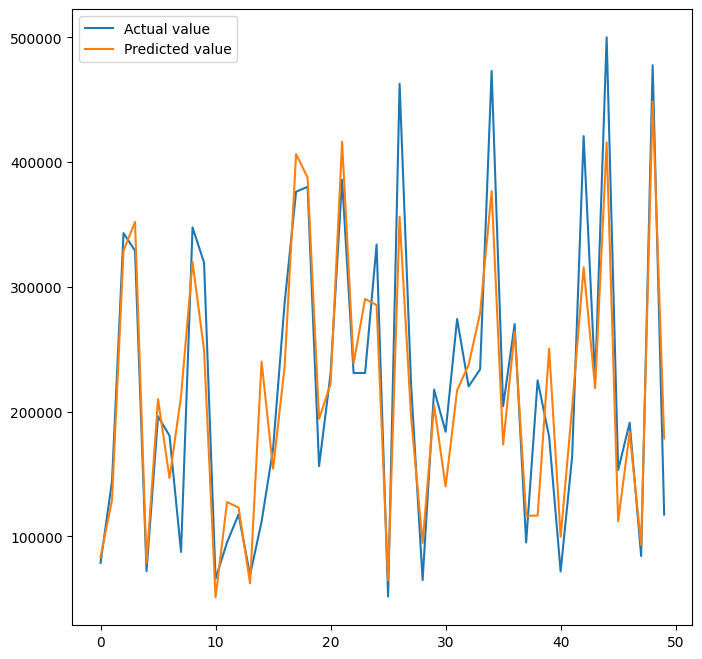

In [55]:
fig = plt.figure(figsize = (8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'], axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value', 'Predicted value'])

In [56]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f"%(mse**(1/2.0)))


RMSE: 221.63


In [57]:
# Determine accuracy using R^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test))
print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 1
